<a href="https://colab.research.google.com/github/rdwn354/Tensorflow_doc/blob/main/CNN/cats_and_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-11-28 10:08:56--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.121.207, 142.250.103.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   226MB/s    in 0.3s    

2023-11-28 10:08:56 (226 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

#extract
zip_ref = zipfile.ZipFile('./cats_and_dogs_filtered.zip')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')

  ])
  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary'
                                                    )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150,150),
                                                              batch_size = 20,
                                                              class_mode = 'binary'
                                                              )



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
100/100 - 17s - loss: 0.6924 - accuracy: 0.5265 - val_loss: 0.6821 - val_accuracy: 0.5210 - 17s/epoch - 165ms/step
Epoch 2/20
100/100 - 5s - loss: 0.6744 - accuracy: 0.5920 - val_loss: 0.6675 - val_accuracy: 0.5870 - 5s/epoch - 49ms/step
Epoch 3/20
100/100 - 6s - loss: 0.6501 - accuracy: 0.6295 - val_loss: 0.6437 - val_accuracy: 0.5970 - 6s/epoch - 60ms/step
Epoch 4/20
100/100 - 6s - loss: 0.6109 - accuracy: 0.6675 - val_loss: 0.6568 - val_accuracy: 0.5830 - 6s/epoch - 56ms/step
Epoch 5/20
100/100 - 5s - loss: 0.5755 - accuracy: 0.6985 - val_loss: 0.6260 - val_accuracy: 0.6390 - 5s/epoch - 50ms/step
Epoch 6/20
100/100 - 6s - loss: 0.5549 - accuracy: 0.7285 - val_loss: 0.6131 - val_accuracy: 0.6800 - 6s/epoch - 63ms/step
Epoch 7/20
100/100 - 5s - loss: 0.5247 - accuracy: 0.7365 - val_loss: 0.5720 - val_accuracy: 0.7140 - 5s/epoch - 50ms/step
Epoch 8/20
100/100 - 5s - loss: 0.5115 - accuracy: 0.7475 - val_loss: 0.6228 - val_accuracy: 0.6530 - 5s/epoch - 53ms/step
Epoch 9/20
10

In [8]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

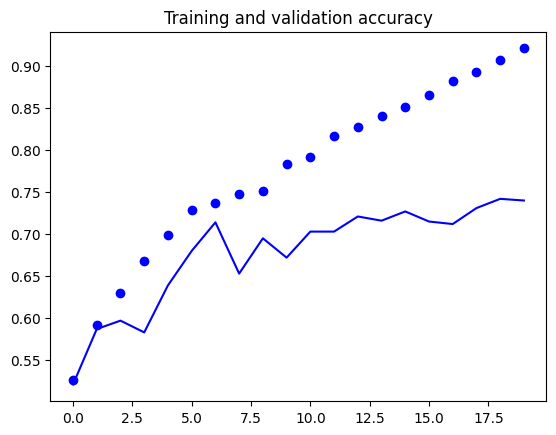

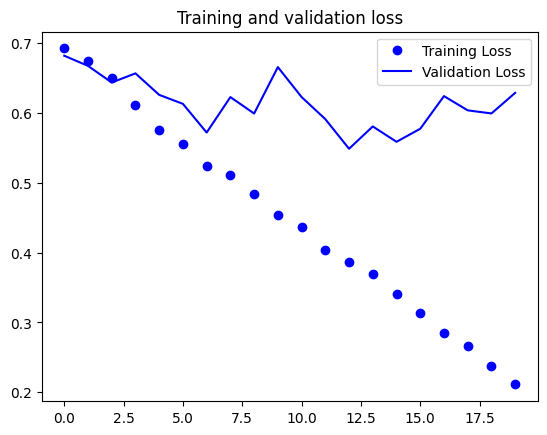

In [9]:

# Plot training results
plot_loss_acc(history)

In [11]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 20s - loss: 0.6956 - accuracy: 0.5025 - val_loss: 0.6883 - val_accuracy: 0.5030 - 20s/epoch - 200ms/step
Epoch 2/20
100/100 - 16s - loss: 0.6894 - accuracy: 0.5335 - val_loss: 0.6871 - val_accuracy: 0.5010 - 16s/epoch - 157ms/step
Epoch 3/20
100/100 - 16s - loss: 0.6846 - accuracy: 0.5650 - val_loss: 0.6840 - val_accuracy: 0.5320 - 16s/epoch - 157ms/step
Epoch 4/20
100/100 - 17s - loss: 0.6784 - accuracy: 0.5715 - val_loss: 0.6588 - val_accuracy: 0.6230 - 17s/epoch - 168ms/step
Epoch 5/20
100/100 - 16s - loss: 0.6646 - accuracy: 0.5985 - val_loss: 0.7073 - val_accuracy: 0.5160 - 16s/epoch - 160ms/step
Epoch 6/20
100/100 - 18s - loss: 0.6650 - accuracy: 0.5935 - val_loss: 0.6400 - val_accuracy: 0.6150 - 18s/epoch - 177ms/step
Epoch 7/20
100/100 - 16s - loss: 0.6506 - accuracy: 0.6045 - val_loss: 0.6276 - val_accuracy: 0.6560 - 16s/epoch - 157ms/step
Epoch 8/20
100/100 - 17s - loss: 0

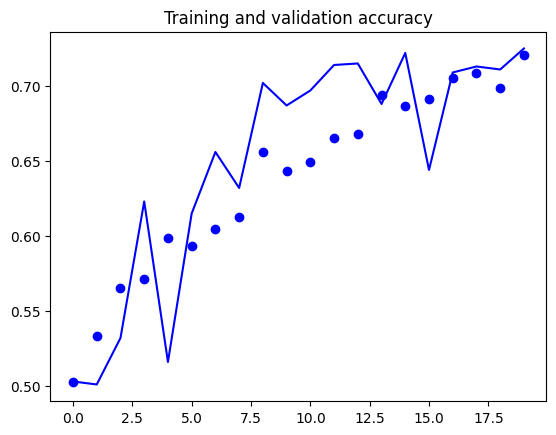

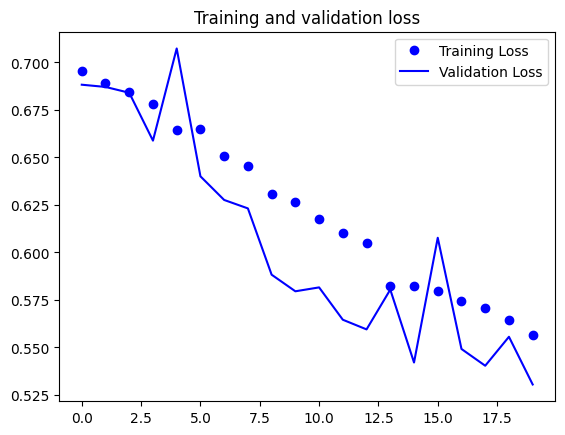

In [12]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)